In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
tf.__version__

'2.0.0'

In [3]:
data = pd.read_csv('DJI.csv')

In [4]:
data.shape

(251, 7)

In [5]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-11-30,25307.140625,25549.710938,25250.970703,25538.460938,25538.460938,482250000
1,2018-12-03,25779.570313,25980.210938,25670.509766,25826.429688,25826.429688,388480000
2,2018-12-04,25752.560547,25773.119141,25008.109375,25027.070313,25027.070313,418900000
3,2018-12-06,24737.419922,24951.009766,24242.220703,24947.669922,24947.669922,471690000
4,2018-12-07,24918.820313,25095.619141,24284.779297,24388.949219,24388.949219,398230000


In [6]:
data.drop(['Date', 'Adj Close', 'Volume'], axis = 1, inplace = True)

In [7]:
data.head()

,Open,High,Low,Close
0,25307.140625,25549.710938,25250.970703,25538.460938
1,25779.570313,25980.210938,25670.509766,25826.429688
2,25752.560547,25773.119141,25008.109375,25027.070313
3,24737.419922,24951.009766,24242.220703,24947.669922
4,24918.820313,25095.619141,24284.779297,24388.949219


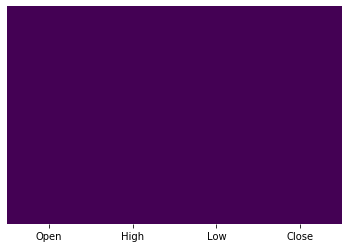

In [8]:
sb.heatmap(data.isna(),
          cbar = False,
          yticklabels = False,
          cmap = 'viridis')
plt.show()

# Data Preprocessing

In [9]:
X = data.iloc[:, :-1].values
Y = data.iloc[:, -1:].values

In [10]:
X.shape, Y.shape

((251, 3), (251, 1))

In [11]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [13]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((200, 3), (200, 1), (51, 3), (51, 1))

# Creating Placeholders

In [14]:
tf.compat.v1.disable_eager_execution()

In [15]:
x = tf.compat.v1.placeholder(dtype = tf.float32)
y = tf.compat.v1.placeholder(dtype = tf.float32)

In [16]:
x, y

(<tf.Tensor 'Placeholder:0' shape=<unknown> dtype=float32>,
 <tf.Tensor 'Placeholder_1:0' shape=<unknown> dtype=float32>)

# Initialising weights and bias

In [17]:
w1 = tf.Variable(tf.compat.v1.random_uniform([x_train.shape[1],10]))
b1 = tf.Variable(tf.zeros([10]))


w2 = tf.Variable(tf.compat.v1.random_uniform([10, 5]))
b2 = tf.Variable(tf.zeros([5]))



wo = tf.Variable(tf.compat.v1.random_uniform([5, 1]))
bo = tf.Variable(tf.zeros([1]))



init = tf.compat.v1.global_variables_initializer()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [18]:
w1, b1

(<tf.Variable 'Variable:0' shape=(3, 10) dtype=float32>,
 <tf.Variable 'Variable_1:0' shape=(10,) dtype=float32>)

In [19]:
w2, b2

(<tf.Variable 'Variable_2:0' shape=(10, 5) dtype=float32>,
 <tf.Variable 'Variable_3:0' shape=(5,) dtype=float32>)

In [20]:
wo, bo

(<tf.Variable 'Variable_4:0' shape=(5, 1) dtype=float32>,
 <tf.Variable 'Variable_5:0' shape=(1,) dtype=float32>)

# Forward propagation

In [21]:
hidden1 = tf.add(tf.matmul(x, w1), b1)
hidden1 = tf.nn.relu(hidden1)


#Layer2 propagation
hidden2 = tf.add(tf.matmul(hidden1, w2), b2)
hidden2 = tf.nn.relu(hidden2)



#Output Layer propagation
out = tf.add(tf.matmul(hidden2, wo), bo)

In [22]:
hidden1

<tf.Tensor 'Relu:0' shape=<unknown> dtype=float32>

In [23]:
hidden2

<tf.Tensor 'Relu_1:0' shape=<unknown> dtype=float32>

In [24]:
out

<tf.Tensor 'Add_2:0' shape=<unknown> dtype=float32>

# Back Propagation

In [25]:
cost = tf.reduce_mean(tf.square(out - y))

In [26]:
train = tf.compat.v1.train.GradientDescentOptimizer(0.01).minimize(cost)

In [27]:
sess = tf.compat.v1.Session()
sess.run(init)

In [28]:
Training_loss = [ ]
Test_loss = [ ]
epoch = 2000
for i in range(epoch):
    sess.run(train, feed_dict = {x:x_train, y:y_train})
    
    Training_loss.append(sess.run(cost, feed_dict = {x: x_train, y: y_train}))
    Test_loss.append(sess.run(cost, feed_dict = {x: x_test, y: y_test}))
    

    print('Epoch :',i,'Training_loss :',Training_loss[i], 'Test_loss :', Test_loss[i])

Epoch : 0 Training_loss : 2.5118136e+20 Test_loss : 2.728569e+20
Epoch : 1 Training_loss : 5.5016074e+16 Test_loss : 5.5016173e+16
Epoch : 2 Training_loss : 5.283744e+16 Test_loss : 5.283754e+16
Epoch : 3 Training_loss : 5.0745073e+16 Test_loss : 5.0745167e+16
Epoch : 4 Training_loss : 4.8735574e+16 Test_loss : 4.873566e+16
Epoch : 5 Training_loss : 4.6805643e+16 Test_loss : 4.680573e+16
Epoch : 6 Training_loss : 4.4952137e+16 Test_loss : 4.4952223e+16
Epoch : 7 Training_loss : 4.317203e+16 Test_loss : 4.3172114e+16
Epoch : 8 Training_loss : 4.146242e+16 Test_loss : 4.1462506e+16
Epoch : 9 Training_loss : 3.982051e+16 Test_loss : 3.982059e+16
Epoch : 10 Training_loss : 3.824362e+16 Test_loss : 3.8243703e+16
Epoch : 11 Training_loss : 3.672917e+16 Test_loss : 3.672925e+16
Epoch : 12 Training_loss : 3.5274697e+16 Test_loss : 3.5274775e+16
Epoch : 13 Training_loss : 3.3877817e+16 Test_loss : 3.3877899e+16
Epoch : 14 Training_loss : 3.2536258e+16 Test_loss : 3.2536334e+16
Epoch : 15 Traini

Epoch : 133 Training_loss : 265566670000000.0 Test_loss : 265573410000000.0
Epoch : 134 Training_loss : 255050270000000.0 Test_loss : 255056850000000.0
Epoch : 135 Training_loss : 244950270000000.0 Test_loss : 244956720000000.0
Epoch : 136 Training_loss : 235250190000000.0 Test_loss : 235256570000000.0
Epoch : 137 Training_loss : 225934300000000.0 Test_loss : 225940530000000.0
Epoch : 138 Training_loss : 216987330000000.0 Test_loss : 216993390000000.0
Epoch : 139 Training_loss : 208394630000000.0 Test_loss : 208400590000000.0
Epoch : 140 Training_loss : 200142170000000.0 Test_loss : 200148030000000.0
Epoch : 141 Training_loss : 192216530000000.0 Test_loss : 192222270000000.0
Epoch : 142 Training_loss : 184604800000000.0 Test_loss : 184610400000000.0
Epoch : 143 Training_loss : 177294420000000.0 Test_loss : 177299940000000.0
Epoch : 144 Training_loss : 170273580000000.0 Test_loss : 170278960000000.0
Epoch : 145 Training_loss : 163530750000000.0 Test_loss : 163536010000000.0
Epoch : 146 

Epoch : 271 Training_loss : 1005939000000.0 Test_loss : 1006352140000.0
Epoch : 272 Training_loss : 966103900000.0 Test_loss : 966508740000.0
Epoch : 273 Training_loss : 927846040000.0 Test_loss : 928242900000.0
Epoch : 274 Training_loss : 891103540000.0 Test_loss : 891492300000.0
Epoch : 275 Training_loss : 855815900000.0 Test_loss : 856196900000.0
Epoch : 276 Training_loss : 821925700000.0 Test_loss : 822299000000.0
Epoch : 277 Training_loss : 789377400000.0 Test_loss : 789743340000.0
Epoch : 278 Training_loss : 758118150000.0 Test_loss : 758476700000.0
Epoch : 279 Training_loss : 728096640000.0 Test_loss : 728448100000.0
Epoch : 280 Training_loss : 699264140000.0 Test_loss : 699608500000.0
Epoch : 281 Training_loss : 671573340000.0 Test_loss : 671910850000.0
Epoch : 282 Training_loss : 644979160000.0 Test_loss : 645309860000.0
Epoch : 283 Training_loss : 619437950000.0 Test_loss : 619762000000.0
Epoch : 284 Training_loss : 594908350000.0 Test_loss : 595225900000.0
Epoch : 285 Traini

Epoch : 411 Training_loss : 3515997200.0 Test_loss : 3540045800.0
Epoch : 412 Training_loss : 3376820700.0 Test_loss : 3400380000.0
Epoch : 413 Training_loss : 3243155500.0 Test_loss : 3266235100.0
Epoch : 414 Training_loss : 3114782500.0 Test_loss : 3137393400.0
Epoch : 415 Training_loss : 2991493600.0 Test_loss : 3013644800.0
Epoch : 416 Training_loss : 2873087000.0 Test_loss : 2894786800.0
Epoch : 417 Training_loss : 2759369500.0 Test_loss : 2780627200.0
Epoch : 418 Training_loss : 2650155000.0 Test_loss : 2670979300.0
Epoch : 419 Training_loss : 2545265000.0 Test_loss : 2565665500.0
Epoch : 420 Training_loss : 2444529400.0 Test_loss : 2464513300.0
Epoch : 421 Training_loss : 2347782700.0 Test_loss : 2367359200.0
Epoch : 422 Training_loss : 2254867000.0 Test_loss : 2274044200.0
Epoch : 423 Training_loss : 2165630500.0 Test_loss : 2184416500.0
Epoch : 424 Training_loss : 2079928200.0 Test_loss : 2098330500.0
Epoch : 425 Training_loss : 1997619600.0 Test_loss : 2015645800.0
Epoch : 42

Epoch : 544 Training_loss : 17720134.0 Test_loss : 18989818.0
Epoch : 545 Training_loss : 17074916.0 Test_loss : 18311314.0
Epoch : 546 Training_loss : 16455254.0 Test_loss : 17659034.0
Epoch : 547 Training_loss : 15860127.0 Test_loss : 17031942.0
Epoch : 548 Training_loss : 15288568.0 Test_loss : 16429055.0
Epoch : 549 Training_loss : 14739643.0 Test_loss : 15849427.0
Epoch : 550 Training_loss : 14212462.0 Test_loss : 15292160.0
Epoch : 551 Training_loss : 13706150.0 Test_loss : 14756367.0
Epoch : 552 Training_loss : 13219892.0 Test_loss : 14241210.0
Epoch : 553 Training_loss : 12752888.0 Test_loss : 13745890.0
Epoch : 554 Training_loss : 12304376.0 Test_loss : 13269626.0
Epoch : 555 Training_loss : 11873620.0 Test_loss : 12811676.0
Epoch : 556 Training_loss : 11459932.0 Test_loss : 12371334.0
Epoch : 557 Training_loss : 11062625.0 Test_loss : 11947909.0
Epoch : 558 Training_loss : 10681043.0 Test_loss : 11540728.0
Epoch : 559 Training_loss : 10314575.0 Test_loss : 11149175.0
Epoch : 

Epoch : 681 Training_loss : 1491120.6 Test_loss : 1201085.9
Epoch : 682 Training_loss : 1488575.4 Test_loss : 1196450.4
Epoch : 683 Training_loss : 1486131.5 Test_loss : 1191957.8
Epoch : 684 Training_loss : 1483784.1 Test_loss : 1187603.0
Epoch : 685 Training_loss : 1481530.2 Test_loss : 1183381.6
Epoch : 686 Training_loss : 1479365.5 Test_loss : 1179289.1
Epoch : 687 Training_loss : 1477286.4 Test_loss : 1175321.0
Epoch : 688 Training_loss : 1475289.0 Test_loss : 1171471.5
Epoch : 689 Training_loss : 1473370.5 Test_loss : 1167738.1
Epoch : 690 Training_loss : 1471529.2 Test_loss : 1164118.5
Epoch : 691 Training_loss : 1469760.4 Test_loss : 1160607.2
Epoch : 692 Training_loss : 1468061.6 Test_loss : 1157200.4
Epoch : 693 Training_loss : 1466429.6 Test_loss : 1153894.2
Epoch : 694 Training_loss : 1464862.5 Test_loss : 1150686.9
Epoch : 695 Training_loss : 1463357.9 Test_loss : 1147574.8
Epoch : 696 Training_loss : 1461912.6 Test_loss : 1144554.4
Epoch : 697 Training_loss : 1460524.8 Te

Epoch : 885 Training_loss : 1426874.9 Test_loss : 1034016.06
Epoch : 886 Training_loss : 1426873.8 Test_loss : 1033981.6
Epoch : 887 Training_loss : 1426873.2 Test_loss : 1033947.8
Epoch : 888 Training_loss : 1426872.8 Test_loss : 1033915.06
Epoch : 889 Training_loss : 1426872.4 Test_loss : 1033882.25
Epoch : 890 Training_loss : 1426871.6 Test_loss : 1033850.25
Epoch : 891 Training_loss : 1426871.0 Test_loss : 1033819.1
Epoch : 892 Training_loss : 1426870.5 Test_loss : 1033788.9
Epoch : 893 Training_loss : 1426870.1 Test_loss : 1033758.56
Epoch : 894 Training_loss : 1426869.5 Test_loss : 1033729.1
Epoch : 895 Training_loss : 1426869.0 Test_loss : 1033700.4
Epoch : 896 Training_loss : 1426868.8 Test_loss : 1033672.6
Epoch : 897 Training_loss : 1426868.1 Test_loss : 1033644.7
Epoch : 898 Training_loss : 1426867.9 Test_loss : 1033617.9
Epoch : 899 Training_loss : 1426867.5 Test_loss : 1033591.6
Epoch : 900 Training_loss : 1426867.2 Test_loss : 1033565.5
Epoch : 901 Training_loss : 1426866

Epoch : 1062 Training_loss : 1426857.9 Test_loss : 1032354.9
Epoch : 1063 Training_loss : 1426857.9 Test_loss : 1032354.06
Epoch : 1064 Training_loss : 1426857.8 Test_loss : 1032353.25
Epoch : 1065 Training_loss : 1426857.8 Test_loss : 1032352.3
Epoch : 1066 Training_loss : 1426857.9 Test_loss : 1032351.7
Epoch : 1067 Training_loss : 1426857.9 Test_loss : 1032350.8
Epoch : 1068 Training_loss : 1426857.8 Test_loss : 1032349.94
Epoch : 1069 Training_loss : 1426857.9 Test_loss : 1032349.25
Epoch : 1070 Training_loss : 1426857.9 Test_loss : 1032348.4
Epoch : 1071 Training_loss : 1426857.9 Test_loss : 1032347.7
Epoch : 1072 Training_loss : 1426857.9 Test_loss : 1032346.75
Epoch : 1073 Training_loss : 1426857.9 Test_loss : 1032345.94
Epoch : 1074 Training_loss : 1426857.9 Test_loss : 1032345.2
Epoch : 1075 Training_loss : 1426857.9 Test_loss : 1032344.4
Epoch : 1076 Training_loss : 1426857.8 Test_loss : 1032343.5
Epoch : 1077 Training_loss : 1426857.8 Test_loss : 1032342.75
Epoch : 1078 Trai

Epoch : 1212 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1213 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1214 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1215 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1216 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1217 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1218 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1219 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1220 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1221 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1222 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1223 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1224 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1225 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1226 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1227 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1228 Training_lo

Epoch : 1363 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1364 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1365 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1366 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1367 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1368 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1369 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1370 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1371 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1372 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1373 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1374 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1375 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1376 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1377 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1378 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1379 Training_lo

Epoch : 1519 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1520 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1521 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1522 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1523 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1524 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1525 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1526 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1527 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1528 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1529 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1530 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1531 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1532 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1533 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1534 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1535 Training_lo

Epoch : 1686 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1687 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1688 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1689 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1690 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1691 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1692 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1693 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1694 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1695 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1696 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1697 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1698 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1699 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1700 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1701 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1702 Training_lo

Epoch : 1849 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1850 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1851 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1852 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1853 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1854 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1855 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1856 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1857 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1858 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1859 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1860 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1861 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1862 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1863 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1864 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1865 Training_lo

In [29]:
y_pred = sess.run(out, feed_dict = {x:x_test})

In [30]:
len(y_pred)

51

In [31]:
y_pred[0:5]

array([[25989.865],
       [25989.865],
       [25989.865],
       [25989.865],
       [25989.865]], dtype=float32)

In [32]:
y_test[0:5]

array([[27359.160156],
       [25169.880859],
       [26452.660156],
       [27171.900391],
       [26783.490234]])

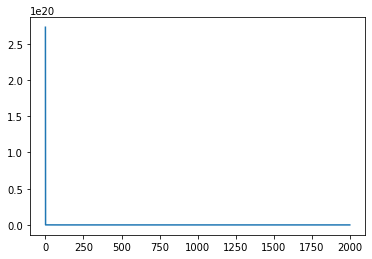

In [33]:
plt.plot(Test_loss)
plt.show()